# HW 3

In [230]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Problem 1

These are my functions and their derivatives, as defined by parts a and b.

In [231]:
# a in the function is definable by "user", x is the root
def func(x):
    return (x**2) - a

# Kepler's equation, eccentricity and M are definable, with E being the root we are finding
def Kepler(E):
    return E - e*np.sin(E) - M

# derivative for first function, as needed for Newton's method
def der_func(x):
    return 2*x

# derivative for Kepler's function, as needed for Newton's method
def der_Kepler(E):
    return 1 - e*np.cos(E)

Here is Bisection Method:

In [232]:
def Bisection(equation, tol, left, right):
    '''I've defined Bisection method as a function that finds roots of an equation that it is fed, and 
    the endpoints between which we go, aptly named left and right. Equation is a previously defined 
    function; tol, left right are numbers (floats most likely). Output is an array of the approximation 
    of the root at each step.'''
    # store our roots here
    BiRoot = []
    # while in the tolerance range, we go along the bracket
    while np.abs(left - right) > tol:
        midpoint = (right + left) / 2
        # if we are on the 
        if equation(left) * equation(midpoint) < 0:
            right = midpoint;
            left = left;
            
        elif equation(left) * equation(midpoint) > 0:
            left = midpoint;
            right = right;  
            
        BiRoot.append(midpoint) # midpoint is our best guess, so we store it in Biroot at each iteration
        
    return np.array(BiRoot) # numpy arrays are easier to work with

And here is Newton-Raphson:

In [233]:
def NewtonRaphson(equation, derivative, tol, start, left, right):
    '''NewtonRaphson takes in a previously-coded in equation, its derivative (both are defined functions),
    and start, left, right: all numerical values for the first guess value, and the endpoints of the
    bracket. It creates a storage list NRoot, which collects all the roots that the method finds as it 
    runs. The return is this list converted to a np.array.'''
    NRoot = []
    '''x is our root'''
    x = start
    '''Determining the reasonableness of the step here'''
    x = x - (equation(x) / derivative(x))

    while np.abs(equation(x)/derivative(x)) > tol:
        '''While the change in our x is significant, do the loop. x_new is a storage variable in case the
        step is unreasonable and a step of bisection needs to be implemented.'''
        x_new = x - (equation(x) / derivative(x))
        '''If the new step takes the guess outside of the bracket, bisection happens:'''
        if x_new < left or x_new > right:
            
            x_new = (right + left) / 2
             
            if equation(left) * equation(x_new) < 0:
                right = x_new;
                left = left;
            elif equation(left) * equation(x_new) > 0:
                left = x_new;
                right = right;
            
        elif equation(x)/derivative(x) > 0:
            '''If the new step is in the bracket, depending on signage of the slope-to-value ratio, the 
             bracket gets adjusted and the value appended:'''
            right = x;
            left = left;
        else:
            left = x
            right = right;
        
        x = x_new    
        NRoot.append(x)
  
    return np.array(NRoot)

### Case a: x^2 = a, a = 2

In [234]:
a = 2  # choose this but can do whatever
start = 1 # for Newton
tol = 10e-10 # a tolerance I chose because it's small but not messing with machine precision
left = 0 # I wanted to get the positive root so I manipulated this bracket to start at 0
right = 2
BiRoot1 = Bisection(func, tol, left, right)
NewRoot1 = NewtonRaphson(func, der_func, tol, start, left, right)

### Case b: Kepler's Equation: M = E - e*sin(E)

In [235]:
# part b
e = 0.5
M = 1.5
tol = 10e-10
start = 1
left = 0
right = 2*np.pi
BiRoot2 = Bisection(Kepler, tol, left, right)
NewRoot2 = NewtonRaphson(Kepler, der_Kepler, tol, start, left, right)
# again but with e = 0.9
e = 0.9
BiRoot3 = Bisection(Kepler, tol, left, right)
NewRoot3 = NewtonRaphson(Kepler, der_Kepler, tol, start, left, right)

### Eror plotting:

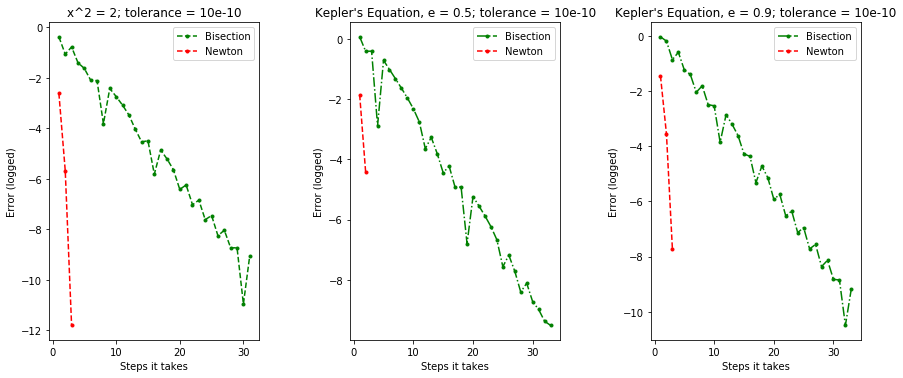

In [236]:
"""part a """
Bisection_error1 = np.array(np.log10(np.abs(BiRoot1 - np.sqrt(2))))
Newton_error1 = np.array(np.log10(np.abs(NewRoot1 - np.sqrt(2))))
# step to plot against
step1a = np.arange(1, len(Bisection_error1)+1)
step1b = np.arange(1, len(Newton_error1)+1)
"""part b, 0.5"""
Bisection_error2 = np.array(np.log10(np.abs(BiRoot2 - NewRoot2[-1])))
Newton_error2 = np.array(np.log10(np.abs(NewRoot2[0:-1] - NewRoot2[-1])))
# step to plot against
step2a = np.arange(1, len(Bisection_error2)+1)
step2b = np.arange(1, len(Newton_error2)+1)
"""part b, 0.9"""
Bisection_error3 = np.array(np.log10(np.abs(BiRoot3 - NewRoot3[-1])))
Newton_error3 = np.array(np.log10(np.abs(NewRoot3[0:-1] - NewRoot3[-1])))
# step to plot against
step3a = np.arange(1, len(Bisection_error3)+1)
step3b = np.arange(1, len(Newton_error3)+1)


"""graphing things"""
fig,ax = plt.subplots(1,3)
fig.set_size_inches(12,5)
fig.tight_layout(w_pad=6)

ax[0].plot(step1a, Bisection_error1,
        color = "g",
        marker = "o",
        linestyle = "--",
        markersize = 3,
        label = "Bisection")
ax[0].plot(step1b, Newton_error1,
        color = "r",
        marker = "o",
        linestyle = "--",
        markersize = 3,
        label = "Newton")
ax[0].set_xlabel("Steps it takes")
ax[0].set_ylabel("Error (logged)")
ax[0].set_title("x^2 = 2; tolerance = 10e-10")
ax[0].legend(loc=0)

ax[1].plot(step2a, Bisection_error2,
        color = "g",
        marker = "o",
        linestyle = "-.",
        markersize = 3,
        label = "Bisection")
ax[1].plot(step2b, Newton_error2,
        color = "r",
        marker = "o",
        linestyle = "--",
        markersize = 3,
        label = "Newton")
ax[1].set_xlabel("Steps it takes")
ax[1].set_ylabel("Error (logged)")
ax[1].set_title("Kepler's Equation, e = 0.5; tolerance = 10e-10")
ax[1].legend(loc=0);

ax[2].plot(step3a, Bisection_error3,
        color = "g",
        marker = "o",
        linestyle = "-.",
        markersize = 3,
        label = "Bisection")
ax[2].plot(step3b, Newton_error3,
        color = "r",
        marker = "o",
        linestyle = "--",
        markersize = 3,
        label = "Newton")
ax[2].set_xlabel("Steps it takes")
ax[2].set_ylabel("Error (logged)")
ax[2].set_title("Kepler's Equation, e = 0.9; tolerance = 10e-10")
ax[2].legend(loc=0);

## Problem 2

### For this problem, Newton is better since it rounds off much faster.

In [237]:
'''First I set up all by variables, and then I made an array called 'last' that collects the last value of
each Newton method as applied with varying M.'''
e = 0.9
tol = 10e-10
start = 1
left = 0
right = 2*np.pi
i = 0
last = []
m = np.linspace(0, 2*np.pi, 20)
m = np.array(m)
for i in range(len(m)):
    M = m[i]
    nRoot = NewtonRaphson(Kepler, der_Kepler, tol, start, left, right)
    last.append(nRoot[-1])

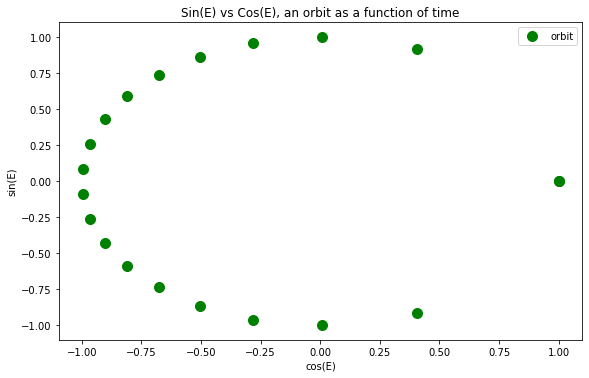

In [238]:
sine = np.array(np.sin(last))
cosine = np.array(np.cos(last))

# general graph settings
fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,5)
fig.tight_layout()
ax.set_xlabel("cos(E)")
ax.set_ylabel("sin(E)")
ax.set_title("Sin(E) vs Cos(E), an orbit as a function of time")

ax.plot(cosine, sine,
        color = "g",
        marker = "o",
        linestyle = "None",
        markersize = 10,
        label = "orbit")


ax.legend(loc=0);

As expected, the orbit is much faster around perihelion. Cool!